In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

## Generating Random Coordinates

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

## Using OpenWeather API

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 13 | flinders
Processing Record 3 of Set 13 | kapaa
Processing Record 4 of Set 13 | karaul
City not found. Skipping...
Processing Record 5 of Set 13 | saskylakh
Processing Record 6 of Set 13 | norman wells
Processing Record 7 of Set 13 | sao filipe
Processing Record 8 of Set 13 | hualmay
Processing Record 9 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 13 | jamestown
Processing Record 11 of Set 13 | heyang
Processing Record 12 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 13 | camacha
Processing Record 14 of Set 13 | lompoc
Processing Record 15 of Set 13 | hangu
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | nikolskoye
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | aflu
City not found. Skipping...
Processing Record 20 of Set 13 | tuktoyaktuk
Processing Record 2

Processing Record 36 of Set 16 | kon tum
Processing Record 37 of Set 16 | chokurdakh
Processing Record 38 of Set 16 | dingle
Processing Record 39 of Set 16 | tatishchevo
Processing Record 40 of Set 16 | meulaboh
Processing Record 41 of Set 16 | port hardy
Processing Record 42 of Set 16 | san quintin
Processing Record 43 of Set 16 | hambantota
Processing Record 44 of Set 16 | flin flon
Processing Record 45 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 16 | atar
Processing Record 47 of Set 16 | shitanjing
Processing Record 48 of Set 16 | saleaula
City not found. Skipping...
Processing Record 49 of Set 16 | rincon
Processing Record 50 of Set 16 | hay river
Processing Record 1 of Set 17 | oistins
Processing Record 2 of Set 17 | hilo
Processing Record 3 of Set 17 | kyra
Processing Record 4 of Set 17 | yar-sale
Processing Record 5 of Set 17 | malwan
City not found. Skipping...
Processing Record 6 of Set 17 | kamaishi
Processing Record 7 of Set 17 | bathsheba
Pr

Processing Record 20 of Set 20 | husavik
Processing Record 21 of Set 20 | bongaree
Processing Record 22 of Set 20 | bakaly
Processing Record 23 of Set 20 | tocopilla
Processing Record 24 of Set 20 | kunming
Processing Record 25 of Set 20 | kaitangata
Processing Record 26 of Set 20 | rawson
Processing Record 27 of Set 20 | biltine
Processing Record 28 of Set 20 | duku
Processing Record 29 of Set 20 | shenjiamen
Processing Record 30 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 20 | coquimbo
Processing Record 32 of Set 20 | funtua
Processing Record 33 of Set 20 | pisco
Processing Record 34 of Set 20 | mayya
Processing Record 35 of Set 20 | pitimbu
Processing Record 36 of Set 20 | saint-pierre
Processing Record 37 of Set 20 | itiuba
Processing Record 38 of Set 20 | ouesso
Processing Record 39 of Set 20 | waipawa
Processing Record 40 of Set 20 | evensk
Processing Record 41 of Set 20 | bismarck
Processing Record 42 of Set 20 | novobirilyussy
Processing Record 

Processing Record 8 of Set 24 | praya
Processing Record 9 of Set 24 | guerrero negro
Processing Record 10 of Set 24 | kropotkin
Processing Record 11 of Set 24 | sisophon
Processing Record 12 of Set 24 | lloydminster
Processing Record 13 of Set 24 | ketchikan
Processing Record 14 of Set 24 | katsiveli
City not found. Skipping...
Processing Record 15 of Set 24 | gazanjyk
Processing Record 16 of Set 24 | ndele
Processing Record 17 of Set 24 | omboue
Processing Record 18 of Set 24 | lithgow
Processing Record 19 of Set 24 | abu kamal
Processing Record 20 of Set 24 | lushunkou
City not found. Skipping...
Processing Record 21 of Set 24 | maunabo
Processing Record 22 of Set 24 | half moon bay
Processing Record 23 of Set 24 | cockburn town
Processing Record 24 of Set 24 | kismayo
Processing Record 25 of Set 24 | basco
Processing Record 26 of Set 24 | saravena
Processing Record 27 of Set 24 | kendari
Processing Record 28 of Set 24 | imphal
Processing Record 29 of Set 24 | athabasca
Processing Re

In [10]:
print(len(city_data))

571


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,69.01,94,36,1.01,AU,2021-04-07 22:23:40
1,Kapaa,22.0752,-159.3190,77.00,65,75,17.27,US,2021-04-07 22:23:41
2,Saskylakh,71.9167,114.0833,-0.58,97,100,5.12,RU,2021-04-07 22:23:41
3,Norman Wells,65.2820,-126.8329,8.60,61,40,9.22,CA,2021-04-07 22:23:42
4,Sao Filipe,14.8961,-24.4956,75.45,65,16,9.08,CV,2021-04-07 22:23:42
5,Hualmay,-11.0964,-77.6139,71.76,81,82,9.28,PE,2021-04-07 22:23:42
6,Jamestown,42.0970,-79.2353,69.80,46,1,13.80,US,2021-04-07 22:23:25
7,Heyang,26.1011,107.4730,52.27,92,100,5.41,CN,2021-04-07 22:23:43
8,Camacha,33.0833,-16.3333,64.40,88,20,2.30,PT,2021-04-07 22:23:43
9,Lompoc,34.6391,-120.4579,64.40,55,57,14.97,US,2021-04-07 22:23:44


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flinders,AU,2021-04-07 22:23:40,-34.5833,150.8552,69.01,94,36,1.01
1,Kapaa,US,2021-04-07 22:23:41,22.0752,-159.3190,77.00,65,75,17.27
2,Saskylakh,RU,2021-04-07 22:23:41,71.9167,114.0833,-0.58,97,100,5.12
3,Norman Wells,CA,2021-04-07 22:23:42,65.2820,-126.8329,8.60,61,40,9.22
4,Sao Filipe,CV,2021-04-07 22:23:42,14.8961,-24.4956,75.45,65,16,9.08


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Graphing with variables from JSON object

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

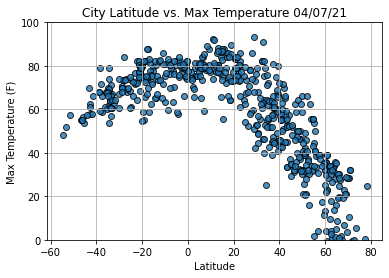

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

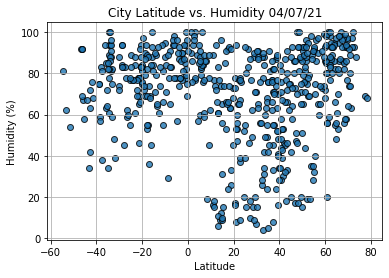

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

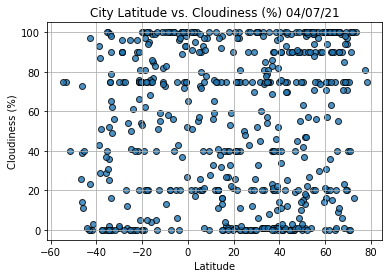

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

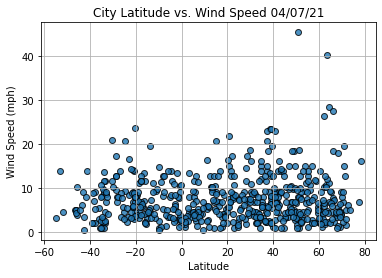

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

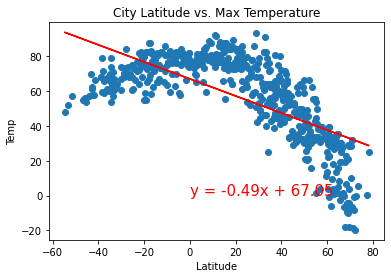

In [26]:
#Define values
x_values = lats
y_values = max_temps

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0,0), fontsize=15, color="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

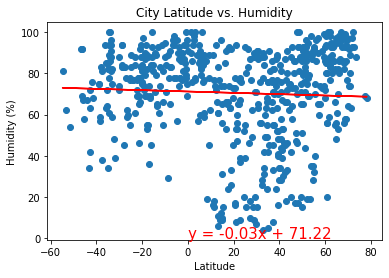

In [27]:
#Define values
x_values = lats
y_values = humidity

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0,0), fontsize=15, color="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

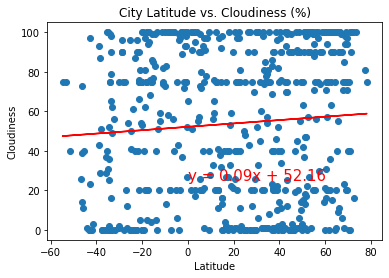

In [29]:
#Define values
x_values = lats
y_values = cloudiness

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0,25), fontsize=15, color="red")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

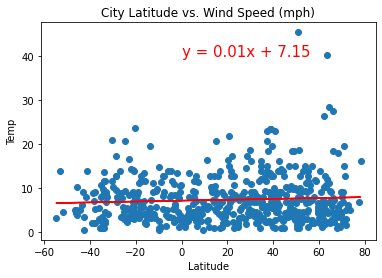

In [31]:
#Define values
x_values = lats
y_values = wind_speed

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0,40), fontsize=15, color="red")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

### Graphing but this time with a function

In [65]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [58]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2021-04-07 22:23:15
Lat                        -53.15
Lng                      -70.9167
Max Temp                     51.8
Humidity                       62
Cloudiness                     75
Wind Speed                   13.8
Name: 13, dtype: object

In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flinders,AU,2021-04-07 22:23:40,-34.5833,150.8552,69.01,94,36,1.01
5,Hualmay,PE,2021-04-07 22:23:42,-11.0964,-77.6139,71.76,81,82,9.28
11,Rikitea,PF,2021-04-07 22:23:44,-23.1203,-134.9692,76.86,61,0,8.41
13,Punta Arenas,CL,2021-04-07 22:23:15,-53.1500,-70.9167,51.80,62,75,13.80
17,Vaini,TO,2021-04-07 22:23:46,-21.2000,-175.2000,80.60,69,20,6.91


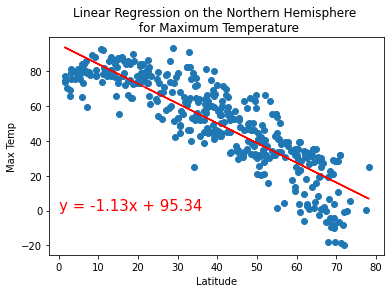

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(0,0))

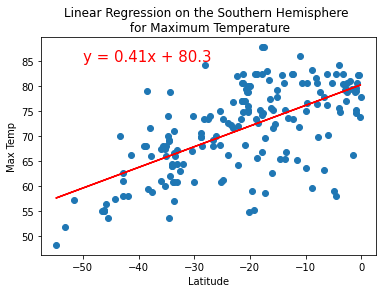

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,85))


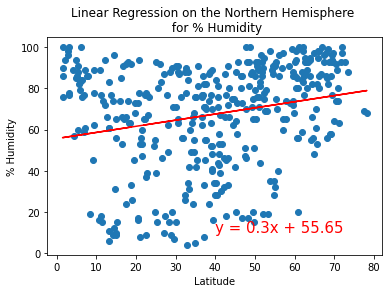

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))

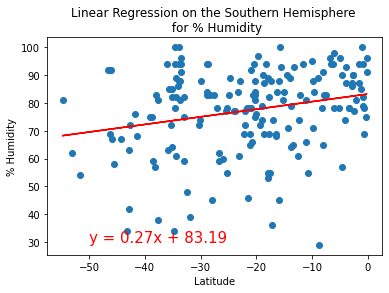

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,30))

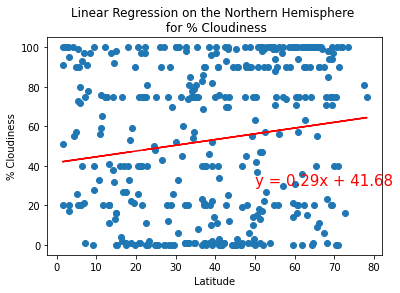

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(50,30))

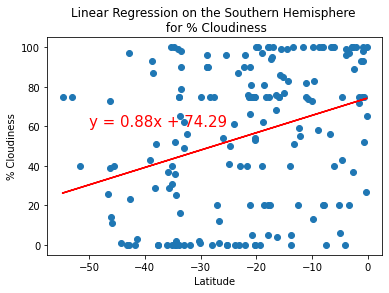

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

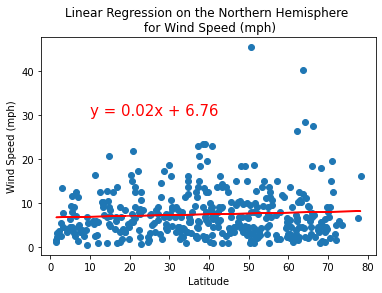

In [88]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)',
                       'Wind Speed (mph)',(10,30))

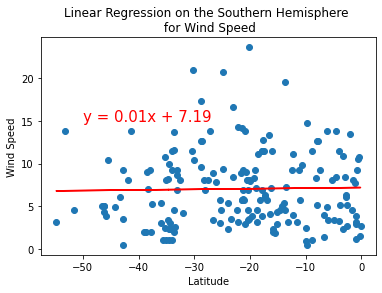

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-50,15))